## Power - A/B testing
---
**Elo notes**

### Power 

The power or sensitivity of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis $Ho$ when the alternative hypothesis $H1$ is true.

The ability of a test to detect an effect, if the effect actually exists. That is,

${\displaystyle {\text{power}}=\mathbb {P} {\big (}{\text{reject }}H_{0 }{\big |}H_{1 }{\text{ is true}}{\big )}}$

As the power increases, there are decreasing chances of a Type II error (false negative), which are also referred to as the false negative rate $β$ since the power is equal to $(1−β)$, again, under the alternative hypothesis. A similar concept is Type I error, also referred to as the “false positive rate” $α$ or the level of a test under the null hypothesis.

Power analysis can be used to calculate the minimum sample size required so that one can be reasonably likely to detect an effect of a given size. 

The concept of power is used to make comparisons between different statistical testing procedures: for example, between a parametric and a nonparametric test of the same hypothesis.

### Factors

Statistical power may depend on a number of factors. Some factors may be particular to a specific testing situation, but at a minimum, power nearly always depends on the following three factors:

- the statistical significance criterion used in the test
- the magnitude of the effect of interest in the population
- the sample size used to detect the effect

A **significance criterion** is a statement of how unlikely a positive result must be, if the null hypothesis of no effect is true, for the null hypothesis to be rejected. 

The most commonly used criteria are probabilities of 

- 0.05 (5%, 1 in 20)
- 0.01 (1%, 1 in 100)
- 0.001 (0.1%, 1 in 1000). 

If the criterion is 0.05, the probability of the data implying an effect at least as large as the observed effect when the null hypothesis is true must be less than 0.05, for the null hypothesis of no effect to be rejected. 

One easy way to increase the power of a test is to carry out a less conservative test by using a larger significance criterion, for example 0.10 instead of 0.05. This increases the chance of rejecting the null hypothesis (i.e. obtaining a statistically significant result) when the null hypothesis is false, that is, reduces the risk of a Type II error (false negative regarding whether an effect exists). But it also increases the risk of obtaining a statistically significant result (i.e. rejecting the null hypothesis) when the null hypothesis is not false; that is, it increases the risk of a Type I error (false positive).

**The sample size** determines the amount of sampling error inherent in a test result. Other things being equal, effects are harder to detect in smaller samples. 

The precision with which the data are measured also influences statistical power. Consequently, power can often be improved by reducing the measurement error in the data. A related concept is to improve the __“reliability”__ of the measure being assessed (as in psychometric reliability).



### Interpretation

Although there are no formal standards for power (sometimes referred to as π), most researchers assess the power of their tests using $π=0.80$ as a standard for adequacy. This convention implies a four-to-one trade off between $β risk$ and $α risk$. 

$β$ is the probability of a Type II error; $α$ is the probability of a Type I error, $0.2$ and $0.05$ are conventional values for $β$ and $α$

Any statistical analysis involving multiple hypotheses is subject to inflation of the type I error rate if appropriate measures are not taken. Such measures typically involve applying a higher threshold of stringency to reject a hypothesis in order to compensate for the multiple comparisons being made.e.g. as in the __Bonferroni method__ 

It is also important to consider the statistical power of a hypothesis test when interpreting its results. A test's power is the probability of correctly rejecting the null hypothesis when it is false; a test's power is influenced by the choice of significance level for the test, the size of the effect being measured, and the amount of data available. 


### Binomial proportion confidence interval

	

In statistics, a binomial proportion confidence interval is a confidence interval for the probability of success calculated from the outcome of a series of success–failure experiments (Bernoulli trials). In other words, a binomial proportion confidence interval is an interval estimate of a success probability p when only the number of experiments n and the number of successes nS are known.

#### Normal approximation interval 

A commonly used formula for a binomial confidence interval relies on approximating the distribution of error about a binomially-distributed observation, $\hat p$, with a __normal distribution__.

This approximation is based on the __central limit theorem__ and is unreliable when the sample size is small or the success probability is close to 0 or 1.

Using the normal approximation, the success probability __p__ is estimated as

$$\hat p \pm z \sqrt{\frac{\hat p \left(1 - \hat p\right)}{n}},$$

or the equivalent

$$\frac{n_S}{n} \pm \frac{z}{n} \sqrt{\frac{n_S n_F}{n}},$$


where:

Let $X$ be the number of successes in $n$ trials and let $p = X/n$. 

$$\hat p = n_S / n$$ 

is the proportion of successes in a __Bernoulli trial__ process, measured with $n$ trials yielding $n_S$ successes and $n_F = n - n_S$ failures, and $z$ is the $1 - \tfrac{\alpha}{2}$ __quantile__ of a __standard normal distribution__ corresponding to the target error rate $\alpha$. 

For a 95% confidence level, the error $\alpha=1-0.95=0.05$, so $1 - \tfrac \alpha 2=0.975$ and $z=1.96$.


In [8]:
from __future__ import division

from math import sqrt

import scipy.stats as scis

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (18, 6)

%matplotlib inline

In [9]:
# Sample data
data = np.loadtxt('manufacturing_weight.txt')

In [10]:
smean = data.mean()
smean

20.519861441022606

In [11]:
ssigma = data.std()
ssigma

0.95768221510418861

In [13]:
s_se = ssigma / sqrt(len(data))

#### Ho: Mean = 20.4
#### Ha: Mean != 20.4

95% of the area under a normal curve lies within 1.96 standard deviations of the mean :  

CI: mean +- 1.96se

In [14]:
mean = 20.4

In [15]:
print'mean: {}, standard deviation: {}, standard error: {}'.format(smean, ssigma, s_se)

mean: 20.519861441, standard deviation: 0.957682215104, standard error: 0.0839942866705


In [39]:
def hypothesis_distribution(hypothesis, se):
    for mean, color in hypothesis.items():
        rv = scis.norm(mean, scale=se)
        x_range = np.linspace(mean - (4*se), mean + (4*se), 1000)
        y = rv.pdf(x_range)
        
        # Graphing the Normal distributions of Ho and Ha
        plt.plot(x_range, y, c=color, label='Hypothesis mean:{}'.format(mean))
        # CV line :  Critical value line (Vertical line) ppf: Percent point function (inverse of Cumulative distribution function — percentiles).
        sign ificance_level = 0.05 / 2 # Two tailed test, Significance Level : alpha
        critical_value_ll = rv.ppf(significance_level)
        critical_value_ul = rv.ppf(1-significance_level)
        plt.axvline(critical_value_ll, c=color, linestyle='--')
        plt.axvline(critical_value_ul, c=color, linestyle='--')
        plt.legend() 
        
        if mean == 20.4:
            cv_ll = rv.ppf(significance_level)
            cv_ul = rv.ppf(1-significance_level)
            
            
    return rv, cv_ll, cv_ul
        

(20.235374223218717, 20.564625776781281)


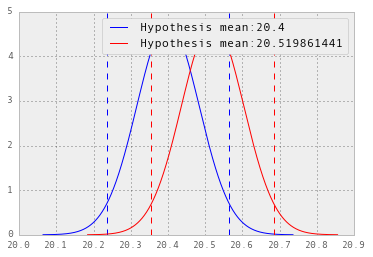

In [40]:
rv_, cv_ll_, cv_ul_ = hypothesis_distribution({mean:'b', smean:'r'}, s_se)
print (cv_ll_, cv_ul_)

In [18]:
# cdf: cumulative density funcion
beta = rv.cdf(cv_ul)

In [19]:
power = 1 - beta
power

0.297035824104805

#### Conclusion: We fail to reject the Null Hypothesis
##### For this hypothesis the altenate hypothesis has a very low Power 0.297, therefore with this experiment the sample size is significantly smaller than the minimum required for us to detect a difference of any effect.

Power calculations are very useful in determining what required minimum sample size is necessary to reach a certain power (usually 80%) given an effect size and a significance level. 

A powerful test would ensure we are able to detect differences in conversion the majority of the time given the difference in fact exists.

To gain insights about the effect size, a small-scale pilot experiment is usually launched. The minimum sample size is computed. Subsequently, a full-scale experiment is run until the minimum sample size is reached.



In [20]:
def power(data, null_mean=20.4, alpha=0.05):
    sample_mean, sample_std = data.mean(), data.std()
    se = sample_std / sqrt(len(data))

    ha = scis.norm(sample_mean, se)
    h0 = scis.norm(null_mean, se)
    
    cv_ll = h0.ppf(alpha/2)
    cv_ul = h0.ppf(1-alpha/2)
    
    beta = ha.cdf(cv_ul) - ha.cdf(cv_ll)
    
    return 1 - beta

In [21]:
power(data)

0.2973891529867565

(0, 1.1)

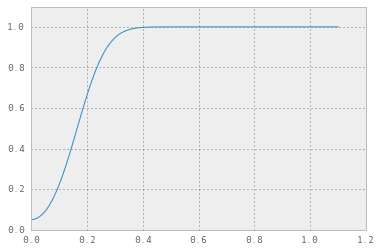

In [22]:
powers = []

effect_size = np.linspace(0, 1.1, 100)

for es_mean in (effect_size + smean):
    powers.append(power(data, es_mean))
    
plt.plot(effect_size, powers)
plt.ylim(0, 1.1)


#### Reference for EDA and AB fundamentals: 03_AB_test.ipynb

Historically, the old page has a conversion of 10% and we wish to test if the new page provides a 0.1% increase (1% lift) in conversion. Recall the null and alternative hypotheses below:

X : p_ha - p_h0


H0 : X = 0.001

HA : X > 0.001

Note: One-tailed test evaluates an increment. X > 0.001

__Binomial proportion confidence interval__ is an interval estimate of a success probability __p__ when only the number of experiments __n__ and the number of successes $n_S$ are known.

Let $X$ be the number of successes in $n$ trials and let $p = X/n$. 


__Standard Error for difference of proportions__

- `p` is a weighted average of the `p1` and `p2` 
- `n1` is the number of subjects sampled from the first population
- `n2` is the number of subjects sampled from the second population

`
p = (sum(new_page)+ sum(old_page)) / float(len(new_page) + len(old_page))
se = sqrt(p * (1- p) * (1/n_ctrl + 1/n_treat))
z_score = (crate_treat - crate_ctrl) / se`

`
crate_ctrl (float): Conversion rate of control df
crate_treat (float):  Conversion rate of treatment df
n_ctrl (int): number of observations in control
n_treat (int): number of observations in treatment`




##### Ho : control : old_page
##### Ha : treatment : new_page

Obtaining the conversion data for the new and old landing pages:



 [I have to stackoverflow things](https://onlinecourses.science.psu.edu/stat100/node/56)
 
 
 Sample size Standard Error (SE) = Square root of (p * (1-p) / n) 
 
 where: 
 
 p = sample proportion : conversion rate : population proportion + random error.

In [23]:
df = pd.read_csv('doe_data.csv')

In [24]:
df[:3]

,user_id,ts,ab,landing_page,converted
0,4040615247,1.356998e+09,treatment,new_page,0
1,4365389205,1.356998e+09,treatment,new_page,0
2,4256174578,1.356998e+09,treatment,new_page,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191148 entries, 0 to 191147
Data columns (total 5 columns):
user_id         191148 non-null int64
ts              191148 non-null float64
ab              191148 non-null object
landing_page    191148 non-null object
converted       191148 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.3+ MB


In [26]:
len(df.user_id.unique())

186388

In [27]:
df.ab.unique()

array(['treatment', 'control'], dtype=object)

In [28]:
df.landing_page.unique()

array(['new_page', 'old_page'], dtype=object)

In [54]:
df_h0 = df[df.ab == 'control'].copy()
n_h0 = float(len(df_h0.user_id.unique()))

# P: Conversion Rate of Ho (Control:Old landing page) : cr_ho
h0_mean = df_h0.converted.mean()
p_h0 = df_h0.converted.sum() / n_h0

print p_h0, h0_mean

0.0996432268152 0.0996421296041


In [55]:
df_ha = df[df.ab == 'treatment'].copy()
n_ha = float(len(df_ha.user_id.unique()))

# P: Conversion Rete of Ha (Treatment: New landing page) : cr_ha
ha_mean = df_ha.converted.mean()
p_ha = df_ha.converted.sum() / n_ha
print p_ha, ha_mean

0.104923933287 0.0999471759042


In [56]:
X = p_ha - p_h0
X

0.005280706472046967

In [57]:
# p : success probability of the Binomial proportion confidence interval
p = (df_ha.converted.sum() + df_h0.converted.sum()) / (n_h0 + n_ha)
p

0.1023510097216559

In [58]:
variance = p * (1-p)
variance

0.09187528053061339

In [59]:
se = np.sqrt(variance * (1. / n_ha + 1. / n_h0))
se

0.0014046302895770726

In [60]:
z_score = X / se
z_score

3.7594992157238489

In [61]:
p_val = 1 - scis.norm.cdf(z_score)
p_val

8.512690565243286e-05

In [62]:
power(df_ha.converted, h0_mean, alpha=0.05)

0.061972006947284775

In [63]:
hazme_mean = 0.001

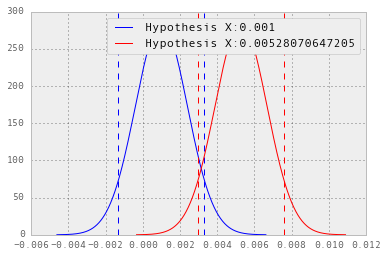

In [64]:
rvalue, cvalue_ll_, cvalue_ul_ = ab_hypothesis_distribution({hazme_mean:'b', X:'r'}, se)

In [51]:
def ab_hypothesis_distribution(hypothesis, se):
    for mean, color in hypothesis.items():
        rv = scis.norm(mean, scale=se)
        x_range = np.linspace(mean - (4*se), mean + (4*se), 1000)
        y = rv.pdf(x_range)
        
        # Graphing the Normal distributions of Ho and Ha
        plt.plot(x_range, y, c=color, label='Hypothesis X:{}'.format(mean))
        # CV line :  Critical value line (Vertical line) ppf: Percent point function (inverse of Cumulative distribution function — percentiles).
        significance_level = 0.05  # Two tailed test, Significance Level : alpha
        # critical value : Z(1-alpha)
        critical_value_ll = rv.ppf(significance_level)
        critical_value_ul = rv.ppf(1-significance_level)
        plt.axvline(critical_value_ll, c=color, linestyle='--')
        plt.axvline(critical_value_ul, c=color, linestyle='--')
        plt.legend() 
        
        if mean == .001:
            cv_ll = rv.ppf(significance_level)
            cv_ul = rv.ppf(1-significance_level)
            
            
    return rv, cv_ll, cv_ul
        

### Computing Minimun Sample Size

##### Difference between two means

__Effect Size:__
Cohen's d is defined as the difference between two means divided by a standard deviation for the data

In [65]:
def sample_size(h0_arr, ha_arr, alpha, power, effect_size, two_tailed=True):
    h0_mean = h0_arr.mean()
    ha_mean = ha_arr.mean()
    p = (h0_arr.sum() + ha_arr.sum()) / float(len(h0_arr) + len(ha_arr))
    variance = p * (1. - p)
    se = np.sqrt(variance * (1. / len(h0_arr) + 1. / len(ha_arr)))
    h0_dist = scis.norm(h0_mean, se)
    ha_dist = scis.norm(ha_mean, se)
    

    z_power = ha_dist.ppf(power)
    
    if two_tailed:
        cv_ul = h0_dist.ppf(1-alpha/2)
        n = (2 * variace)*(cv_ul + z_power)**2 / effect_size**2
    else:
        cv_ul = h0_dist.ppf(1-alpha)
        n = (2 * variance)*(cv_ul + z_power)**2 / effect_size**2
    
    return n
        

In [66]:
sample_size(df_h0.converted, df_ha.converted, 0.05, 0.8, 0.001, False)

7404.7870363209377